# Notebook to visualize results

## 4.1 RBM for recognising MNIST images

In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet

### 1) convergence and stability

learning CD1


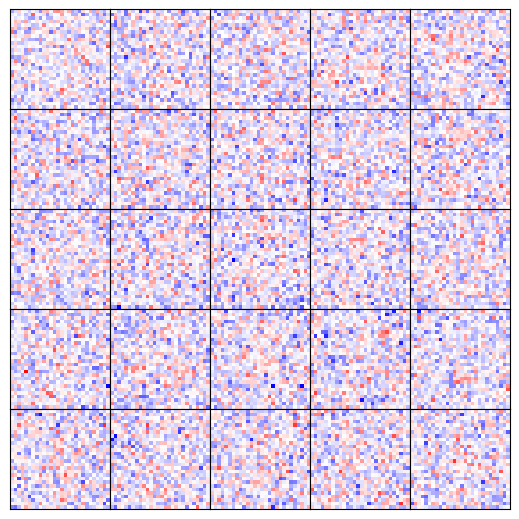

iteration=      0 recon_loss=87.0543


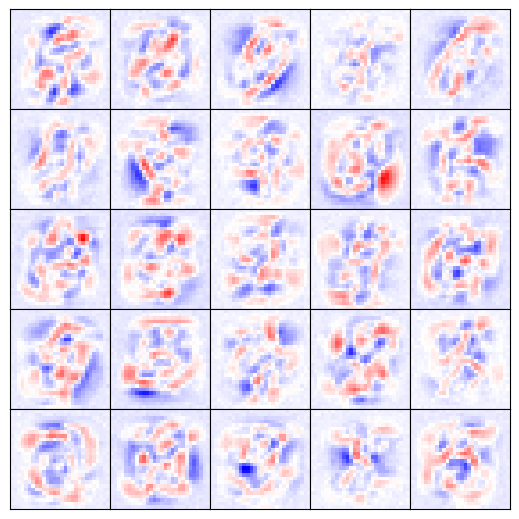

iteration=   5000 recon_loss=24.6089


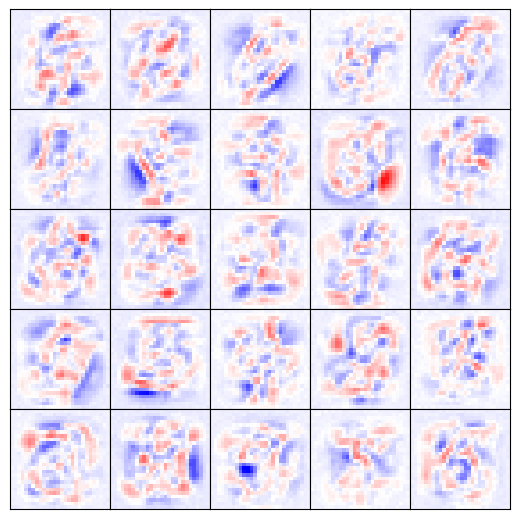

iteration=  10000 recon_loss=25.6507


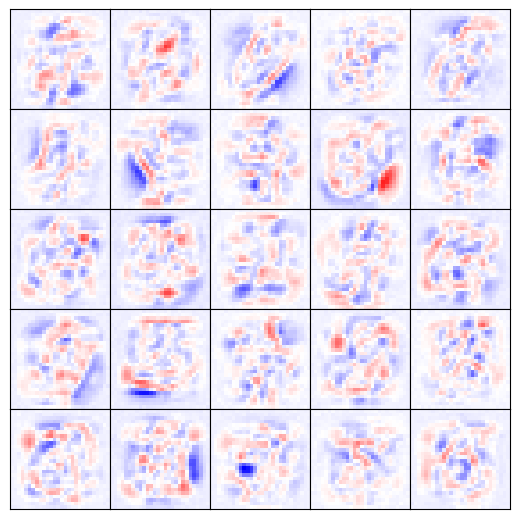

iteration=  15000 recon_loss=22.3592


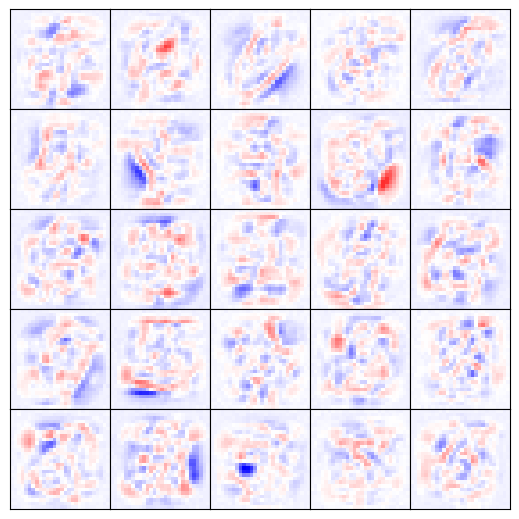

iteration=  20000 recon_loss=22.1049


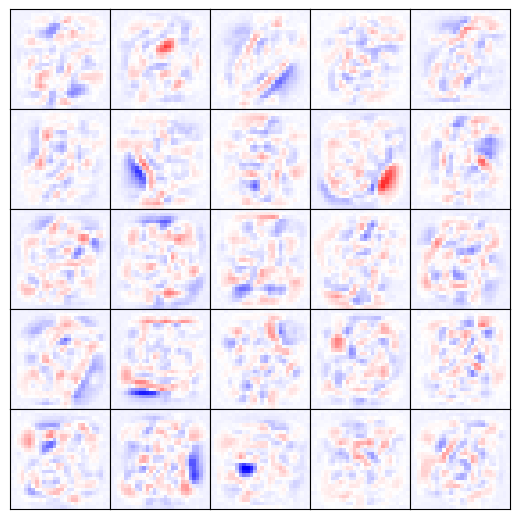

iteration=  25000 recon_loss=23.0395


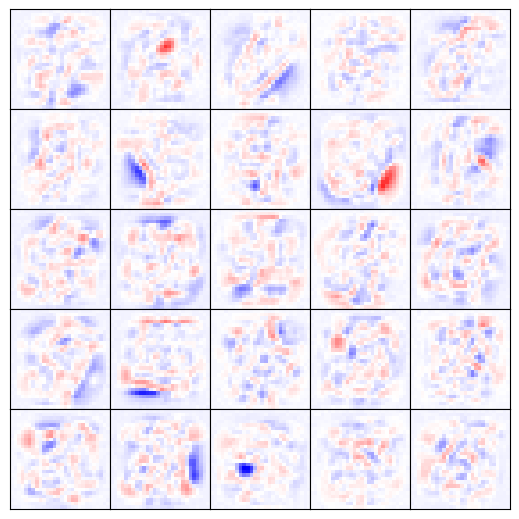

iteration=  30000 recon_loss=21.3284


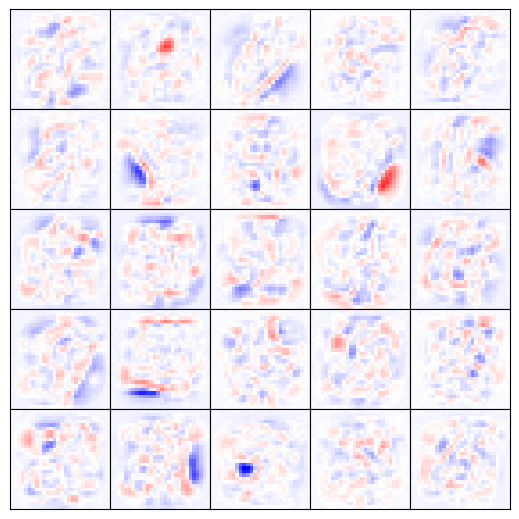

iteration=  35000 recon_loss=21.7066


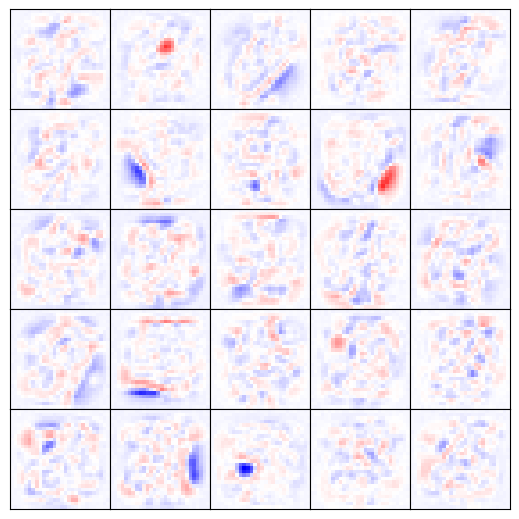

iteration=  40000 recon_loss=22.8081


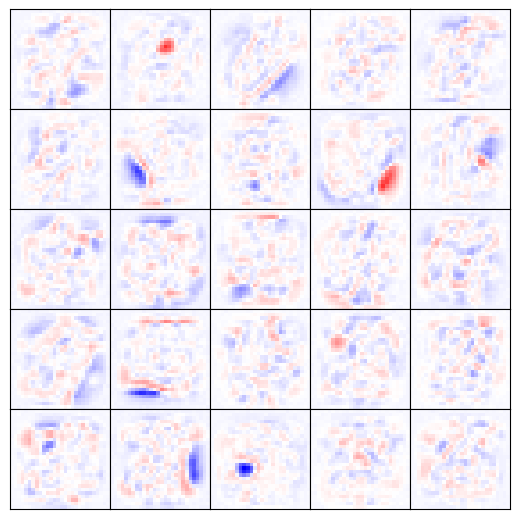

iteration=  45000 recon_loss=20.8375


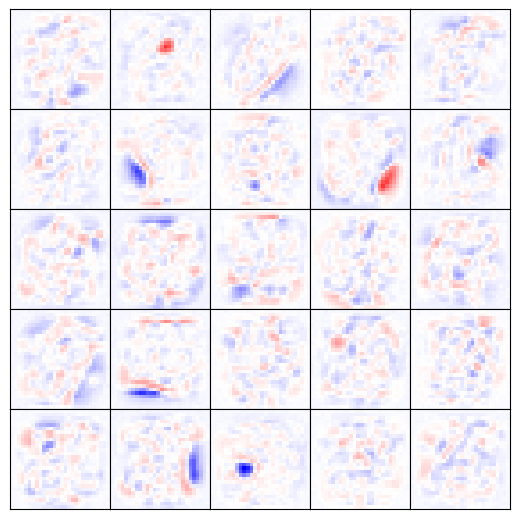

iteration=  50000 recon_loss=21.3641


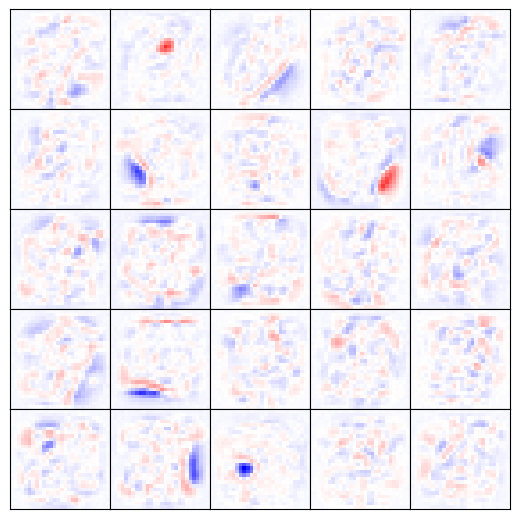

iteration=  55000 recon_loss=22.9247


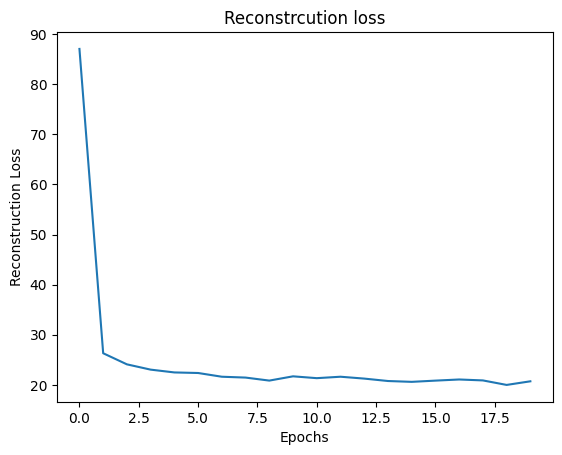

[87.05426114171347,
 26.303680324546164,
 24.085901632271238,
 23.03069713188515,
 22.47153473009178,
 22.359216869292936,
 21.613931386688215,
 21.444805362774677,
 20.84285909098138,
 21.693797581748516,
 21.32836807846364,
 21.61447569107867,
 21.241405888173055,
 20.75868045667141,
 20.591671421942667,
 20.83749614696402,
 21.06426372933681,
 20.877355933469634,
 19.978745338048224,
 20.701455631973893]

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
batch_s=20
nb_data=60000
epochs=20


rbm = RestrictedBoltzmannMachine(ndim_visible=784,
                                ndim_hidden=500,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=batch_s)
nb_it = int(epochs * (nb_data // batch_s))
rbm.cd1(visible_trainset=train_imgs, n_iterations=nb_it,bool_plot=True)



#### 2) average reconstruction loss

learning CD1
iteration=      0 recon_loss=87.0460
iteration=   5000 recon_loss=25.4482
iteration=  10000 recon_loss=25.1466
iteration=  15000 recon_loss=21.7652
iteration=  20000 recon_loss=21.9855
iteration=  25000 recon_loss=23.5574
learning CD1
iteration=      0 recon_loss=86.5033
iteration=   5000 recon_loss=25.8157
iteration=  10000 recon_loss=26.4361
iteration=  15000 recon_loss=21.9788
iteration=  20000 recon_loss=23.1551
iteration=  25000 recon_loss=23.8767
learning CD1
iteration=      0 recon_loss=87.2278
iteration=   5000 recon_loss=26.1181
iteration=  10000 recon_loss=25.8517
iteration=  15000 recon_loss=22.8540
iteration=  20000 recon_loss=22.8744
iteration=  25000 recon_loss=24.0820
learning CD1
iteration=      0 recon_loss=86.4911
iteration=   5000 recon_loss=26.4266
iteration=  10000 recon_loss=26.2962
iteration=  15000 recon_loss=22.9533
iteration=  20000 recon_loss=23.1333
iteration=  25000 recon_loss=24.3383
learning CD1
iteration=      0 recon_loss=86.8958
iteration=

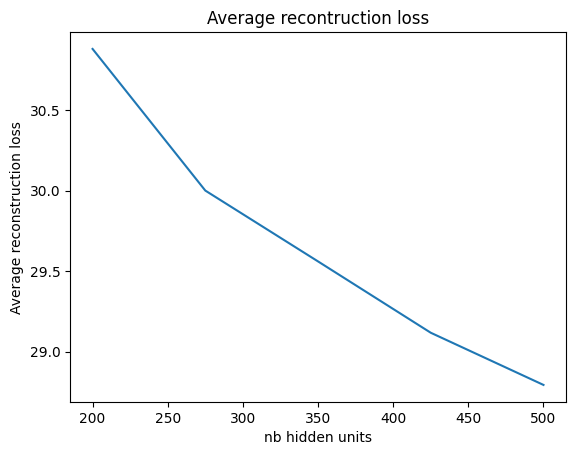

In [3]:
# for diff nb hidden units 
epochs=10
Nb_h=np.linspace(500,200,5).astype(int)
R=[]
for n in Nb_h:
    rbm = RestrictedBoltzmannMachine(ndim_visible=784,
                                ndim_hidden=n,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=batch_s)
    
    nb_it = int(epochs * (nb_data // batch_s))
    R_loss=rbm.cd1(visible_trainset=train_imgs, n_iterations=nb_it,bool_plot=False)
    r_loss=np.mean(R_loss)
    R.append(r_loss)

plt.plot(Nb_h,R)
plt.xlabel("nb hidden units")
plt.ylabel("Average reconstruction loss")
plt.title("Average recontruction loss")
plt.show()

#### 3) examine outcomes

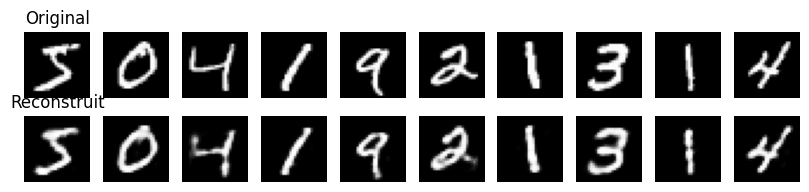

In [4]:
def img_show(imgs_original, imgs_reconstructed, n=10):
    fig, axs = plt.subplots(2, n, figsize=(n, 2))
    for i in range(n):
        axs[0, i].imshow(imgs_original[i].reshape(28, 28), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].imshow(imgs_reconstructed[i].reshape(28, 28), cmap='gray')
        axs[1, i].axis('off')
    axs[0, 0].set_title('Original')
    axs[1, 0].set_title('Reconstruit')
    plt.show()

_, h = rbm.get_h_given_v(train_imgs[:10])
p_recon, _ = rbm.get_v_given_h(h)

img_show(train_imgs[:10], p_recon)

## 4.2 Towards deep networks - greedy layer-wise pretraining

#### 1) stack 2 RBMs

In [15]:
rbm_layer_1 = RestrictedBoltzmannMachine(ndim_visible=784,
                                ndim_hidden=500,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=batch_s)

rbm_layer_2 = RestrictedBoltzmannMachine(ndim_visible=500,
                                ndim_hidden=500,
                                is_bottom=False,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=batch_s)


learning CD1
iteration=      0 recon_loss=87.1675
iteration=   5000 recon_loss=25.2083
iteration=  10000 recon_loss=24.7546
iteration=  15000 recon_loss=22.1128
iteration=  20000 recon_loss=22.2957
iteration=  25000 recon_loss=23.9739


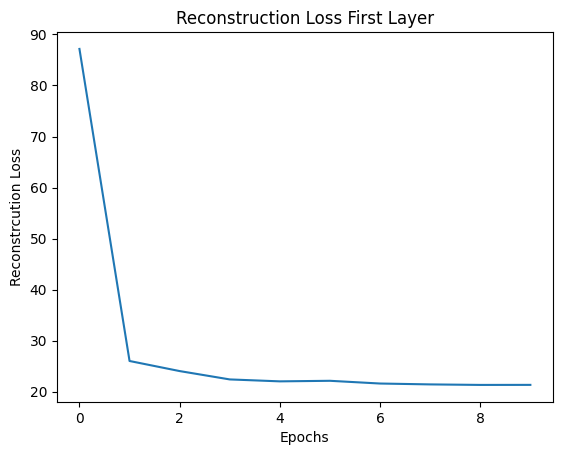

In [16]:
epochs=10
# training first layer rbm

nb_it = int(epochs * (nb_data // batch_s))
R_loss=rbm_layer_1.cd1(visible_trainset=train_imgs, n_iterations=nb_it,bool_plot=False)

plt.plot(R_loss)
plt.xlabel("Epochs")
plt.ylabel("Reconstrcution Loss")
plt.title("Reconstruction Loss First Layer")
plt.show()

learning CD1
iteration=      0 recon_loss=63.7297
iteration=   5000 recon_loss=35.2656
iteration=  10000 recon_loss=34.3072
iteration=  15000 recon_loss=35.7551
iteration=  20000 recon_loss=34.1898
iteration=  25000 recon_loss=33.0206


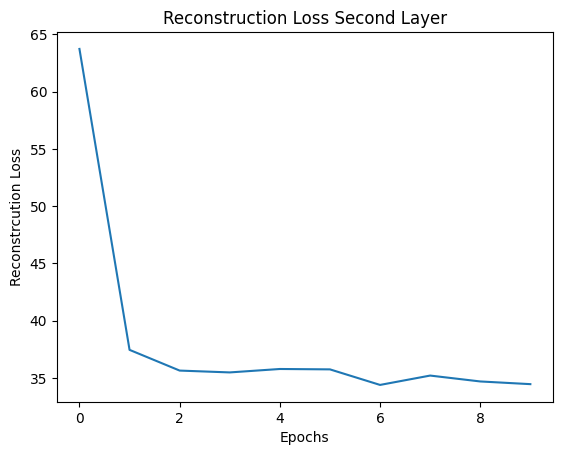

In [17]:
# training second layer layer rbm
ph1,_=rbm_layer_1.get_h_given_v(train_imgs)
R_loss_2=rbm_layer_2.cd1(visible_trainset=ph1, n_iterations=nb_it,bool_plot=False)

plt.plot(R_loss_2)
plt.xlabel("Epochs")
plt.ylabel("Reconstrcution Loss")
plt.title("Reconstruction Loss Second Layer")
plt.show()